# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
cities_weather = []

for city in cities:
    final_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"

     # Increase counter by one 
    
    print("Processing Record"+str(count)+"of"+str(len(cities))+"|"+city)


    

    try:
        response = requests.get(final_url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lng':response['coord']['lon'],
                               'Max Temp':response['main']['temp_max'],
                               'Humidity':response['main']['humidity'],
                               'Cloudiness':response['clouds']['all'],
                               'Wind Speed':response['wind']['speed'],
                               'Country':response['sys']['country'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
    count=count+1  
    

print('Data Retrieval Complete')      


Processing Record1of624|paita
Processing Record2of624|nylstroom
City not found. Skipping...
Processing Record3of624|pisco
Processing Record4of624|punta arenas
Processing Record5of624|ushuaia
Processing Record6of624|husavik
Processing Record7of624|leningradskiy
Processing Record8of624|rikitea
Processing Record9of624|cape town
Processing Record10of624|vardo
Processing Record11of624|saint george
Processing Record12of624|port alfred
Processing Record13of624|georgetown
Processing Record14of624|pachino
Processing Record15of624|wollongong
Processing Record16of624|quatre cocos
Processing Record17of624|teguldet
Processing Record18of624|narsaq
Processing Record19of624|lata
Processing Record20of624|khatanga
Processing Record21of624|biltine
Processing Record22of624|castro
Processing Record23of624|xining
Processing Record24of624|metro
Processing Record25of624|atuona
Processing Record26of624|bethel
Processing Record27of624|puerto ayora
Processing Record28of624|suao
City not found. Skipping...
Proces

In [6]:
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paita,-5.0892,-81.1144,66.76,80,36,11.83,PE,1624283497
1,pisco,-13.7000,-76.2167,64.45,77,90,4.61,PE,1624283499
2,punta arenas,-53.1500,-70.9167,41.11,75,75,14.97,CL,1624283207
3,ushuaia,-54.8000,-68.3000,49.66,53,40,5.75,AR,1624283328
4,husavik,66.0449,-17.3389,53.51,56,99,7.87,IS,1624283500


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_weather_df.to_csv(output_data_file)

In [8]:
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.425460,17.644255,70.694565,66.033748,56.573712,8.048455,1.624284e+09
std,33.429304,90.591251,15.770725,22.842193,38.809960,5.597009,1.388113e+02
min,-54.800000,-175.200000,33.550000,4.000000,0.000000,0.000000,1.624283e+09
25%,-8.054050,-63.984350,57.720000,53.000000,14.500000,3.760000,1.624284e+09
50%,24.687700,20.866700,73.420000,72.000000,71.000000,7.000000,1.624284e+09
75%,49.164000,102.518550,82.140000,83.000000,95.000000,11.600000,1.624284e+09
max,78.218600,179.316700,113.560000,100.000000,100.000000,30.600000,1.624284e+09


In [9]:
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paita,-5.0892,-81.1144,66.76,80,36,11.83,PE,1624283497
1,pisco,-13.7000,-76.2167,64.45,77,90,4.61,PE,1624283499
2,punta arenas,-53.1500,-70.9167,41.11,75,75,14.97,CL,1624283207
3,ushuaia,-54.8000,-68.3000,49.66,53,40,5.75,AR,1624283328
4,husavik,66.0449,-17.3389,53.51,56,99,7.87,IS,1624283500


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
cities_weather_df['Humidity'].unique()

array([ 80,  77,  75,  53,  56,  76,  82,  62,  89,  19,  29,  86,  59,
        63,  49,  68,  10,  79,  87,  96,  84,   6,  57,  58,  93,  91,
        46,  47,  60,  83,  52,  88,  54, 100,  73,  72,  64,  15,  78,
        42,  66,  81,  74,  45,  41,  85,  48,  95,  61,  98,  71,  94,
        16,  65,  69,  17,  31,  38,  55,  70,  51,  13,  90,  32,  34,
        40,  44,  97,  27,  28,  26,  20,  92,  14,  50,  25,  35,   9,
        43,  67,  33,  24,  18,  36,  30,   5,  11,  22,   4,  23,  21,
        39,  99,  37], dtype=int64)

In [17]:
#  Get the indices of cities that have humidity over 100%.

#seems no city have humidity over100%

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

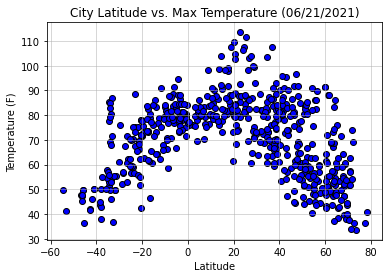

In [11]:
# Latitude vs. Temperature Plot
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Max Temp'],facecolors = "blue", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save fig
plt.savefig("output_data/City_Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

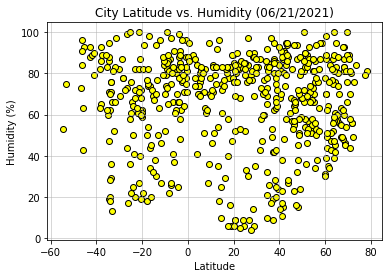

In [12]:
# Latitude vs. Humidity Plot
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Humidity"],facecolors = "yellow", edgecolors ="black",marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save fig
plt.savefig("output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

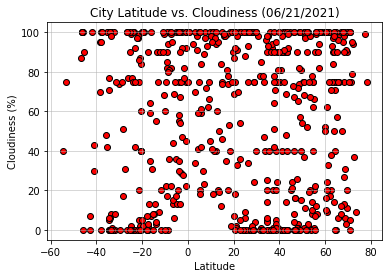

In [13]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Cloudiness'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

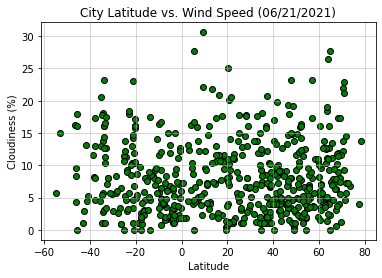

In [14]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Wind Speed"],facecolors = "green", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("output_data/City_Latitude_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [15]:
# define a function called plot_linregress
def plot_linregress(X, y, title):
    print(f"The r-squared is: {round(st.pearsonr(X, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X, y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
    plt.scatter(X, y)
    plt.plot(X,regress_values,"r-")
    plt.title(title + '\n' + line_eq)
    plt.xlabel(X.name)
    plt.ylabel(y.name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.65


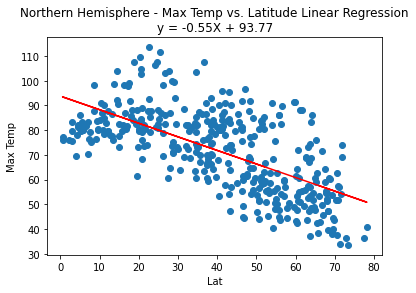

In [16]:
# Create Northern DataFrames
northern_hemisphere_df = cities_weather_df.loc[cities_weather_df['Lat'] >= 0]
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# from the linear regression we can find that Max Temp and Latitude are somehow related in northern hemisphere.
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.74


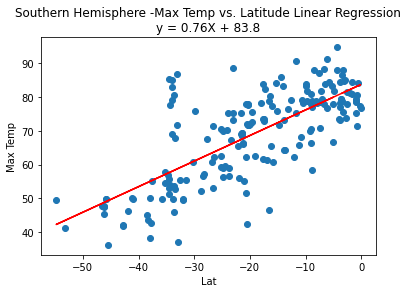

In [17]:
# Create Sourthern DataFrames
southern_hemisphere_df = cities_weather_df.loc[cities_weather_df['Lat'] < 0]

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], 'Southern Hemisphere -Max Temp vs. Latitude Linear Regression')
# from the linear regression we can find that Max Temp and Latitude are highly related in southern hemisphere.
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02


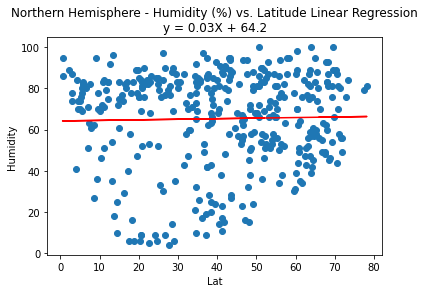

In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# from the linear regression we can find that humidity and latitude do not have good linear coorelation in northern hemisphere.
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06


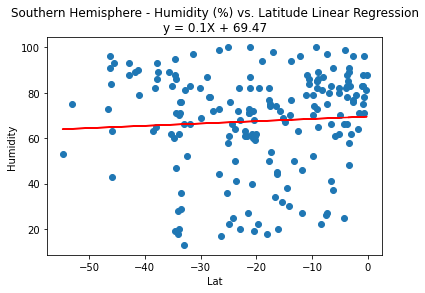

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# from the linear regression we can find that humidity and latitude do not have good linear coorelation in southern hemisphere.
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04


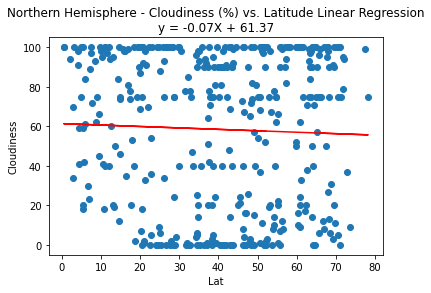

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# from the linear regression we can find that cloudness and latitude do not have good linear coorelation in northern hemisphere.
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07


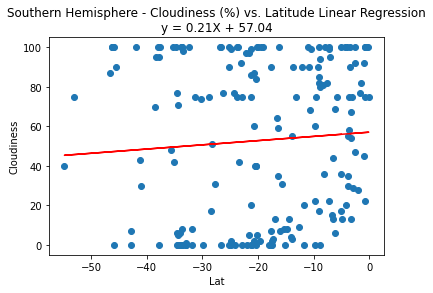

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# from the linear regression we can find that cloudness and latitude do not have good linear coorelation in southern hemisphere.
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0


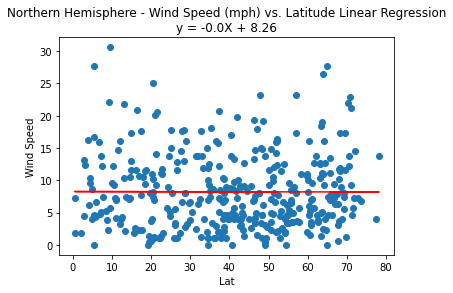

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
# from the linear regression we can find that wind speen and latitude do not have good linear coorelation in northern hemisphere.
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26


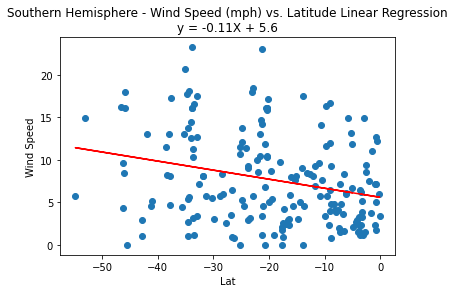

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
# from the linear regression we can find that windspeed and latitude do not have good linear coorelation in southern hemisphere.
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")